
# Ejemplo Clasificador Naive de Bayes



Crear un ndarray con numpy como estructura del dataset

Se acomodan en X los valores de entrada del arreglo

y se clasifica manualmente 0 o 1, dado que tenemos solo dos clases

Utilizar sklean para generar algo como lo anterior pero aleatorio   
<u> Ej. Ilustrativo del prof <u/>

In [7]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=1200,
    n_informative=2,
    random_state=10,
    n_clusters_per_class=1,
)
print(X)
print(y)

[[-0.49292831  0.64624352 -0.34768547  0.79572758  1.17111337 -0.76830354]
 [ 1.53374582  0.23621852 -0.4299839   0.75571356  0.95793018 -1.09830157]
 [ 0.59649887  0.9529053   0.20024028  1.87129138  0.4797375   0.79114941]
 ...
 [-0.47508001  0.97502456 -0.26154305  0.97089938  1.30680547 -0.44930856]
 [ 0.45597946 -1.64127058 -0.4049783   0.24117475 -0.7211819  -1.52483034]
 [ 0.08503145  3.89917344  0.48885418 -2.51287265  2.54118265  2.34530902]]
[0 0 2 ... 0 1 2]


X contiene las n-tuplas y 'y' a que clase pertenece las clases son numeradas de 0 a n_classes-1
Ahora graficamos el dataset generado

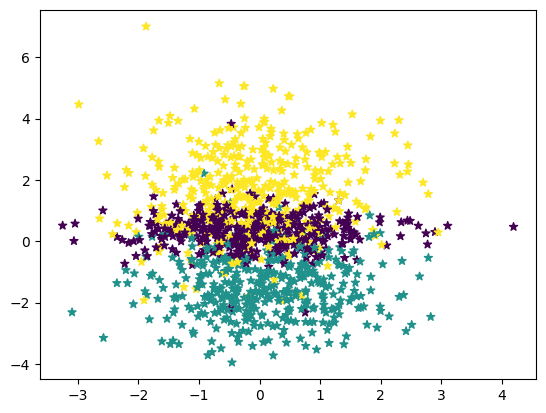

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

Ahora se divide el dataset en dos grupos, test y modelo de evaluacion. usando el valor de 0.33 como cantidad o 33% del dataset como training. 125 es el valor semilla del generador de numeros aleatorios para seleccionar los casos.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)
print("X_train:",X_train)
print("X_test:",X_test)
print("y_train:",y_train)
print("y_test:",y_test)

X_train: [[-0.14881365 -1.64303529 -0.59735313  0.68025733 -0.38619623 -2.04448308]
 [-1.67043832  0.41038049 -0.36290825 -1.99475682  0.9922964  -0.87144889]
 [ 0.83606208 -2.63393989 -0.31293152 -0.93172501 -1.74685551 -1.53760745]
 ...
 [-1.90437247 -1.92263649 -0.04365379  0.88541579 -1.59833088 -0.62370874]
 [ 0.32035501  1.79465429  0.1936812  -0.93159007  1.22440904  0.99493297]
 [ 0.36841263  2.28881348  0.32449266  1.26984983  1.42601234  1.4779976 ]]
X_test: [[-2.08289499 -2.04915652 -0.94887125 -1.0501085  -0.12503099 -3.10003408]
 [ 0.14036849  0.08675889 -0.44960118 -0.20471307  0.8620614  -1.19057202]
 [-0.48310646  1.67702762  0.32595841 -0.35431677  0.89055786  1.3209771 ]
 ...
 [-2.58555255  1.00541272 -0.17588446  0.01673353  1.18343156 -0.21013407]
 [ 1.25847953 -0.59584668 -0.20634814 -0.26273008 -0.15804034 -0.71368241]
 [-0.60125997  1.90423525  0.25990857  0.68593469  1.20400647  1.20250339]]
y_train: [1 0 1 0 0 1 0 1 0 0 1 0 0 2 1 2 2 1 0 0 1 0 2 2 0 2 2 0 0 2 0

Contruccion del Modelo y Entrenamiento

Se verifica que el caso de prueba t_test[6] el cual fue ya marcado coincida con el valor estimado por el modelo: predicted[0]

In [10]:
from sklearn.naive_bayes import GaussianNB
#Shows
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

print(y_test)
print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

[1 0 2 0 2 2 0 2 0 2 2 2 1 0 0 2 0 0 1 1 0 1 1 1 1 0 2 2 0 1 2 1 2 2 2 2 2
 0 1 1 2 2 0 2 0 1 2 2 2 2 0 1 2 1 2 0 2 0 1 0 0 1 2 2 1 1 2 0 1 2 0 0 1 2
 1 0 1 0 0 0 0 1 0 0 2 1 2 1 1 2 2 1 1 1 2 1 1 1 1 2 0 0 0 0 2 2 0 1 2 2 0
 2 1 1 0 2 2 1 2 1 1 0 0 1 2 0 0 1 0 2 2 1 0 1 0 2 0 1 2 1 1 2 1 0 2 1 0 1
 0 0 1 0 1 0 1 2 0 2 2 1 1 0 1 1 0 0 2 2 1 2 1 1 2 1 1 0 2 0 2 2 0 1 0 1 2
 1 0 1 0 1 0 2 1 2 1 2 0 2 0 2 0 0 1 1 1 1 2 0 0 1 1 2 0 0 1 1 1 0 1 1 1 2
 1 2 0 0 1 2 0 2 0 2 2 1 2 2 1 0 2 2 0 0 2 2 0 1 1 0 0 0 2 0 1 0 0 0 2 0 2
 0 2 0 1 0 1 0 1 1 2 2 1 0 1 0 0 2 1 0 0 1 1 2 2 0 1 1 0 0 0 0 0 1 1 1 0 1
 0 2 1 2 2 0 1 0 0 1 0 1 2 0 1 0 2 2 0 1 0 0 1 2 2 2 2 2 0 2 0 2 1 0 0 2 1
 1 1 1 2 2 1 1 0 0 0 2 0 1 0 2 1 1 0 0 1 2 2 0 2 1 2 1 1 1 0 0 1 1 2 0 2 2
 2 1 2 0 2 2 0 0 1 0 2 0 0 2 2 1 1 1 2 2 2 1 2 0 1 2]
Actual Value: 0
Predicted Value: 1


Evaluación del Modelo

In [11]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9343434343434344
F1 Score: 0.9341791865603047


Visualización de la Matrix de Confusion:

Esta matrix nos permite ver cuantos casos no fueron exitosos en la prediccion.

La posicion CF(2,0) = 4  se interpreta como que el valor esperado era 2 y predijo 0 4 veces. Lo cual es un falso positivo.

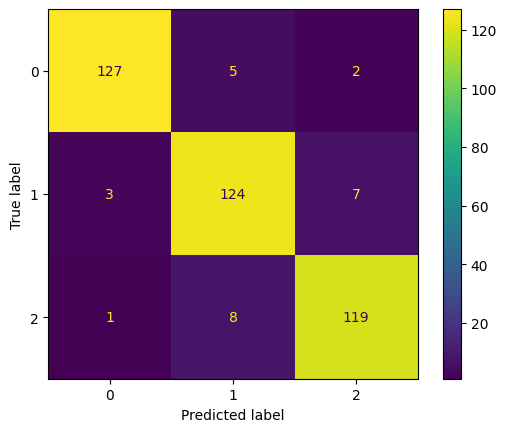

In [12]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# Tarea no.3
Aplicar la plantilla al data set de Peliculas

In [13]:
# para no 'upload' data
# importando archivo de datos desde el drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

download = drive.CreateFile({'id': '1wunEQPvINiHD5JqVa6Ug9wRpNEFwo-ju'})
download.GetContentFile('archive.zip')

In [14]:
import numpy as np
import pandas as pd
df_peliculas = pd.read_csv('archive.zip', compression='zip')
df_peliculas.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


### Clasificación “automática”
* Nuestra clasificación consistirá en asignar un puntaje (score) que adjudique si la película en cuestión está orientada al público **masculino** o **femenino**.

* Cuanto más alto se cifre el puntaje en la escala **positiva**, cuanto mayor en escala la película estará más orientada al público **masculino**. Y por tanto, la película se clasificará con **+1**.

* Cuanto más alto se cifre el puntaje en la escala **negativa**, denotara que la película en cuestión estará más orientada al público **femenino**. La película se clasificará con **-1**, para el público femenino.

* Cuanto más cercano a **0** en el puntaje en la escala implicará que la película estará clasificada como de orientación neutra; *ie*. La película está orientada tanto para el género masculino como para el femenino.

### Para calcular el puntaje (score):
* Tomaremos los campos **cast** y **listed_in**:

* En **cast** lo que pretendemos es identificar el genero (masc ó fem) del elenco **cast** en cada una de las peliculas.
* Sí los **nombres** en **cast** son masculinos o femeninos se le adjudicará un puntaje de **+1/-1** respectivamente. Para adjudicar el género se tomará la última letra del nombre de los participantes. Las terminaciones en: e, o, d, h, n, m, l, g, ó sus combinaciones pares, por ej. 'en', 'hn','oh','on', etc. en cada uno de los nombres serán clasificadas con un puntaje de **+1 (masculino)**. Todas las terminaciones distintas a las antes mencionadas !(e, o, h, n, m, l, g) serán clasificadas con un puntaje **-1 (femenino)**.

_Nota: Ciertamente las reglas de pre-procesamiento para indentificar el genero del elenco de en la variable **cast** necesita una elaboración más rigurosa. No obstante, para fines ilustrativos las consideraremos en esta asignación._  

* El listado de puntajes  en **listed_in** será:

<div align="center">

**genero**               |**puntaje**
:------------------------|:---------:
Action|2.5,
Adventure|1.5,
and Culture|-0.5,
Animation|-0.5,
Anime|1,
Arthouse|-1.5,
Arts|-1.5,
Comedy|1.5,
Documentary|0,
Drama|-3,
Entertainment|-2.0,
Faith and Spirituality|-1.5,
Fantasy|-1,
Fitness|-2.5,
Historical|2,
Horror|2.5,
International|0,
Kids |0,
LGBTQ|-3.5,
Military and War|3.5,
Music Videos and Concerts|0,
Romance|-5.5,
Science Fiction|2,
Special Interest|0,
Sports|2.5,
Suspense|1.5,
Talk Show and Variety|0,
TV Shows|0,
Unscripted|0,
Western|+2,
Young Adult Audience|1.0

</div>


* Se aplicará la siguente expresión en cada uno de los registros para optener el puntaje final clasificatorio:
\begin{align}
target\,predict\, y=\sum_{i=1}^{n=9667} cast\,feature\,masc_i + cast\,feature\, fem_i +  	genero\,film \,feature\, masc\,fem_i
\end{align}


* La clasificación final será de acuerdo a la siguiente regla:
\begin{align}
        target\,predict\, y(x) = \left\{
        \begin{array}{ccl}
        \text{masculino} & \text{si} & x > 1 \\
        \text{neutro} &\text{si} & -1 \le x \le 1 \\
        \text{femenino} &\text{si} & x < -1.
        \end{array}
        \right.
    \end{align}

In [15]:
df_clasificacion = df_peliculas.loc[:,['title', 'cast','listed_in']]
df_clasificacion.head()

,title,cast,listed_in
0,The Grand Seduction,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent","Comedy, Drama"
1,Take Care Good Night,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar","Drama, International"
2,Secrets of Deception,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...","Action, Drama, Suspense"
3,Pink: Staying True,"Interviews with: Pink, Adele, Beyoncé, Britney...",Documentary
4,Monster Maker,"Harry Dean Stanton, Kieran O'Brien, George Cos...","Drama, Fantasy"


### Preprocesamiento de datos

In [16]:
## Clasificacion en **cast**
# eleminacion del apellido (no es perfecto)
nombres_cast = df_clasificacion['cast'].str.split(",|-|:", expand = True).replace("(\w\'\w+|\w+)$", "", regex=True)
# la regla < No es perfecta > y se nesecita mas pre-procesamiento. Pero es una buena en 1ra aproximacion
lex_masc = "(e|o|d|f|h|n|m|l|s|t|k|w|en|hn|oh)"
lex_fem = "[^" + lex_masc + "]" # aunque no es necesario

def f_reg(lex):
    return ".+" + lex + "$"

df_clasificacion['cast_feature_masc'] = nombres_cast.apply(lambda x: x.str.strip().str.match(f_reg(lex_masc), case=False).sum(), axis=1)
df_clasificacion['cast_feature_fem'] = nombres_cast.apply(lambda x: x.str.strip().str.match(f_reg(lex_fem), case=False).sum(), axis=1)
df_clasificacion['cast_feature_fem'] = df_clasificacion['cast_feature_fem'] * (-1)
df_genero_film = df_clasificacion['listed_in'].str.split(', ', expand = True)

# Asignacion de puntaje en pelicula segun el tipo o genero/o tipo de pelicula:
gen_score = {
    'Action':2.5,
    'Adventure':1.5,
    'and Culture':-0.5,
    'Animation':-0.5,
    'Anime':1,
    'Arthouse':-1.5,
    'Arts':-1.5,
    'Comedy':1.5,
    'Documentary':0,
    'Drama':-3,
    'Entertainment':-2.0,
    'Faith and Spirituality':-1.5,
    'Fantasy':-1,
    'Fitness':-2.5,
    'Historical':2,
    'Horror':2.5,
    'International':0,
    'Kids' :0,
    'LGBTQ':-3.5,
    'Military and War':3.5,
    'Music Videos and Concerts':0,
    'Romance':-5.5,
    'Science Fiction':2,
    'Special Interest':0,
    'Sports':2.5,
    'Suspense':1.5,
    'Talk Show and Variety':0,
    'TV Shows':0,
    'Unscripted':0,
    'Western':+2,
    'Young Adult Audience':1.0
    }
df_clasificacion['genero_film_feature_masc_fem'] = df_genero_film.applymap(lambda x: gen_score[x], na_action='ignore').sum(axis=1)
df_clasificacion['target_predict_y'] = df_clasificacion['cast_feature_masc'] + df_clasificacion['cast_feature_fem'] + df_clasificacion['genero_film_feature_masc_fem']
def f_categ_genero(scr):
    if -1.0 <=scr <=1:
        return "Neutro"
    elif scr < -1.0:
        return "Femenino"
    elif scr > 1.0:
        return "Masculino"


df_clasificacion["clasif_genero_film_y"] = df_clasificacion['target_predict_y'].apply(f_categ_genero)

<ipython-input-16-aca77f3e7c6f>:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clasificacion['genero_film_feature_masc_fem'] = df_genero_film.applymap(lambda x: gen_score[x], na_action='ignore').sum(axis=1)


###Visualización de las observaciones

In [17]:
df_clasificacion.head()

,title,cast,listed_in,cast_feature_masc,cast_feature_fem,genero_film_feature_masc_fem,target_predict_y,clasif_genero_film_y
0,The Grand Seduction,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent","Comedy, Drama",2,-1,-1.5,-0.5,Neutro
1,Take Care Good Night,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar","Drama, International",2,-1,-3.0,-2.0,Femenino
2,Secrets of Deception,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...","Action, Drama, Suspense",5,-1,1.0,5.0,Masculino
3,Pink: Staying True,"Interviews with: Pink, Adele, Beyoncé, Britney...",Documentary,1,-3,0.0,-2.0,Femenino
4,Monster Maker,"Harry Dean Stanton, Kieran O'Brien, George Cos...","Drama, Fantasy",7,-1,-4.0,2.0,Masculino


## Aplicación del Modelo 'Naive' Bayesiano (de acuerdo a la plantilla)

In [18]:
## Adaptacion a la plantilla de ejemplo
X = df_clasificacion.loc[:, ['cast_feature_masc', 'cast_feature_fem', 'genero_film_feature_masc_fem']].to_numpy()

# Transformando los clasif a un numero entero; Femenino=-1, Neutro=0, Masculino=+1
y = df_clasificacion['clasif_genero_film_y']

y =(y
    .replace("Neutro", 0)
    .replace("Femenino",-1)
    .replace("Masculino", 1)
    .to_numpy()
    )


### Graf. de Clasificación de peliculas



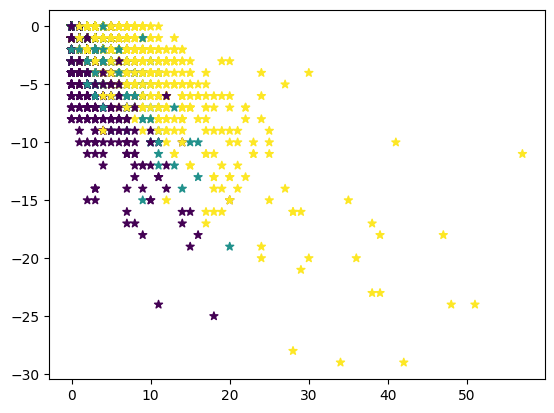

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*")

## División del dataset Train (Entrenamiento) y Test (Prueba)    
Dividimos el set en dos grupos, test y modelo de evaluacion. usando el valor de 0.30 (30%) del dataset como training. El valor semilla del generador de numeros aleatorios para seleccionar los casos es 123.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123
)

print("X_train:",X_train)
print("X_test:",X_test)
print("y_train:",y_train)
print("y_test:",y_test)

X_train: [[ 7.  -1.   5.5]
 [ 2.  -1.   3.5]
 [ 2.  -2.  -3. ]
 ...
 [ 2.  -1.  -2.5]
 [ 1.   0.   1.5]
 [ 5.  -5.  -1.5]]
X_test: [[  1.   -2.    2.5]
 [  3.    0.    2.5]
 [  6.   -5.    1. ]
 ...
 [ 15.  -10.   -4. ]
 [  3.    0.   -1.5]
 [  0.    0.    0. ]]
y_train: [ 1  1 -1 ... -1  1 -1]
y_test: [1 1 1 ... 0 1 0]


## Construcción del Modelo + Verificación de Valores de prueba

Se verifica que el caso de prueba t_test[6] el cual fue ya marcado coincida con el valor estimado por el modelo: predicted[0]

In [21]:
from sklearn.naive_bayes import GaussianNB
#Shows
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

print(y_test)
print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])


[1 1 1 ... 0 1 0]
Actual Value: 1
Predicted Value: 1


### Evaluación del Modelo

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7094105480868665
F1 Score: 0.7028310097060774


### Visualización de la Matriz de Confusion   
**Recordatorio: -1 representa 'Femenino', 0 'Neutro', y +1 'Masculino'*


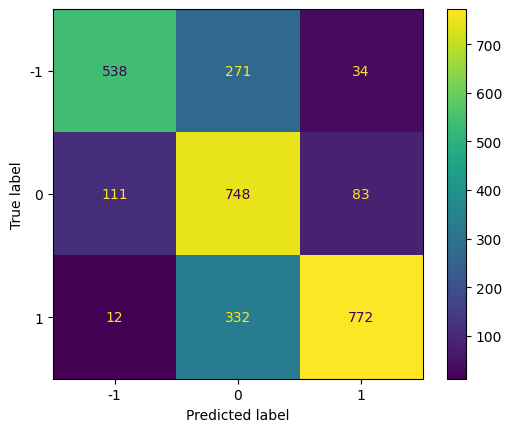

In [23]:
labels = [-1,0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()